In [735]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dphi-amsterdam-airbnb-data/airbnb_listing_validate.csv
/kaggle/input/dphi-amsterdam-airbnb-data/airbnb_listing_train.csv
/kaggle/input/dphi-amsterdam-airbnb-data/sample_submission.csv


In [736]:
airdata = pd.read_csv('/kaggle/input/dphi-amsterdam-airbnb-data/airbnb_listing_train.csv')

In [737]:
airdata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,nan,De Pijp - Rivierenbuurt,52.35,4.90,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,nan,Oud-Oost,52.36,4.92,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,nan,Centrum-West,52.38,4.90,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,nan,Westerpark,52.38,4.87,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,nan,Westerpark,52.38,4.87,Private room,2,89,26-02-2020,4.02,1,24,90


In [738]:
airdata.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price'],
      dtype='object')

### Cleaning of data begain 

In [739]:
airdata.isnull().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [740]:
airdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [741]:
airdata['reviews_per_month'] = airdata['reviews_per_month'].fillna(np.mean(airdata['reviews_per_month']))

In [742]:
print(airdata.neighbourhood_group.unique())
print(airdata.neighbourhood.unique())
print(airdata.last_review.unique())

[nan]
['De Pijp - Rivierenbuurt' 'Oud-Oost' 'Centrum-West' 'Westerpark'
 'Centrum-Oost' 'De Baarsjes - Oud-West' 'Noord-West' 'Bos en Lommer'
 'De Aker - Nieuw Sloten' 'Oostelijk Havengebied - Indische Buurt'
 'Bijlmer-Centrum' 'Watergraafsmeer' 'Slotervaart' 'Osdorp' 'Zuid'
 'Geuzenveld - Slotermeer' 'Oud-Noord' 'Buitenveldert - Zuidas'
 'IJburg - Zeeburgereiland' 'Noord-Oost' 'Gaasperdam - Driemond'
 'Bijlmer-Oost']
['15-02-2020' '19-06-2019' '16-03-2020' ... '24-03-2016' '06-04-2018'
 '13-09-2017']


It only contain nan value so no need of this column

In [743]:
airdata = airdata.drop('neighbourhood_group',axis=1)

In [744]:
print("Host name Contains this",airdata.host_name.unique().shape)

Host name Contains this (4537,)


In [745]:
airdata['last_review']=airdata['last_review'].astype(str)
airdata['last_review'] = airdata['last_review'].fillna(airdata['last_review'].mode()[0])

In [746]:
airdata = airdata.dropna()

In [747]:
airdata.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

In [748]:
airdata.shape

(12871, 15)

# Exploratory Data analysis

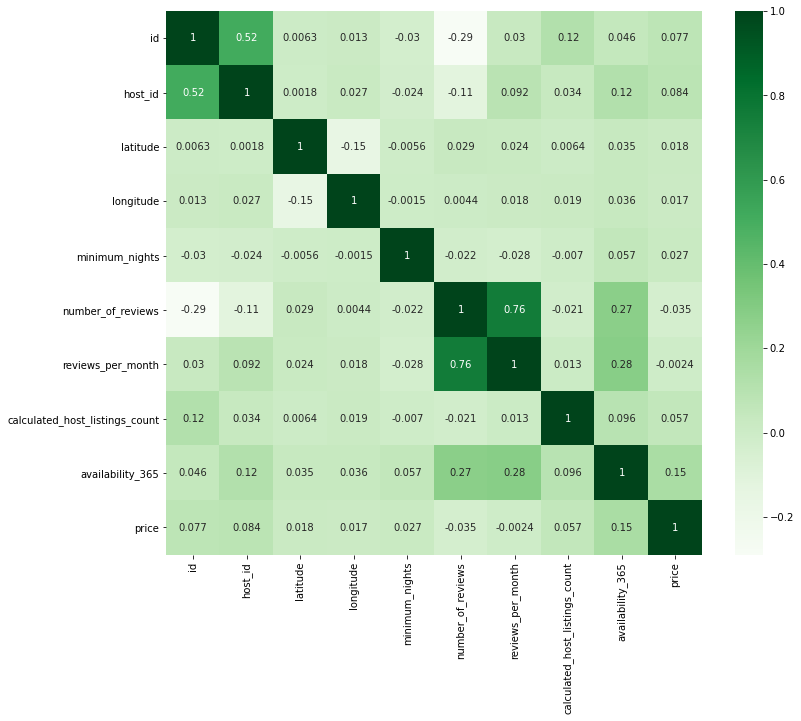

In [749]:
cor = airdata.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)

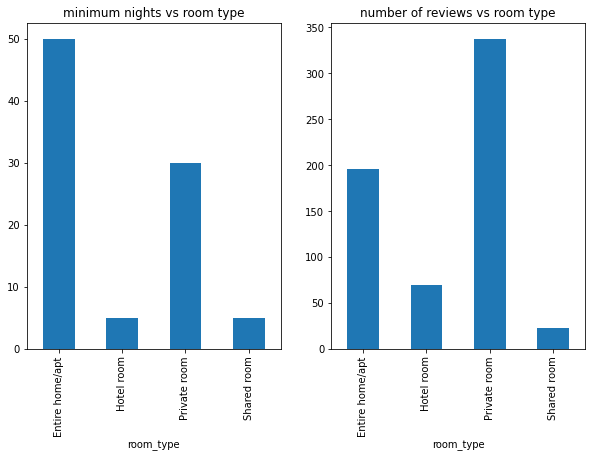

In [750]:
plt.subplot(1, 2, 1)
airdata.groupby('room_type')['minimum_nights'].nunique().plot(kind='bar',figsize=(10,6),title='minimum nights vs room type')
plt.subplot(1, 2, 2)
airdata.groupby('room_type')['number_of_reviews'].nunique().plot(kind='bar',figsize=(10,6),title='number of reviews vs room type')
plt.show()

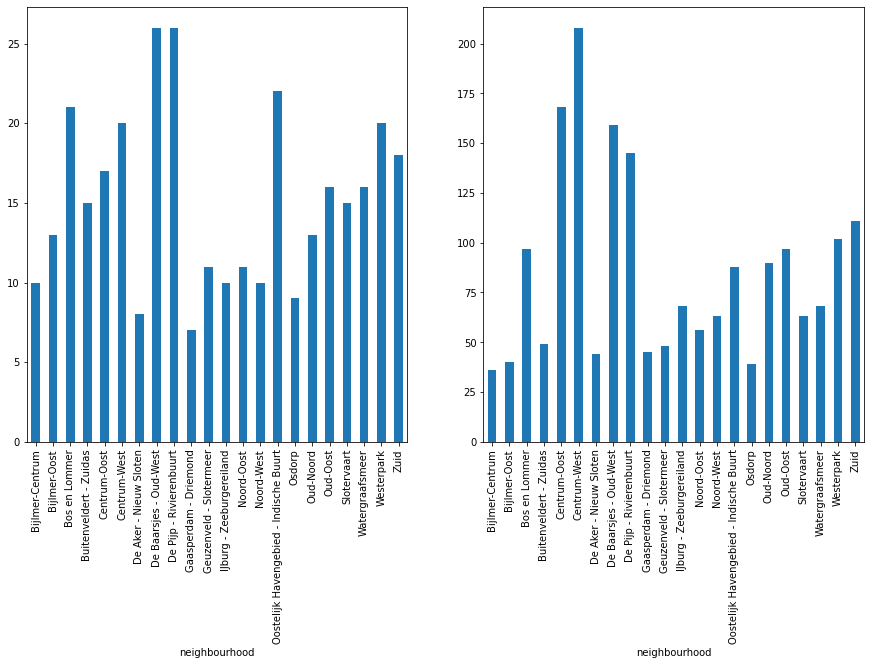

In [751]:
plt.subplot(1, 2, 1)
airdata.groupby('neighbourhood')['minimum_nights'].nunique().plot(kind='bar',figsize=(15,8))
plt.subplot(1, 2, 2)
airdata.groupby('neighbourhood')['number_of_reviews'].nunique().plot(kind='bar',figsize=(15,8))
plt.show()

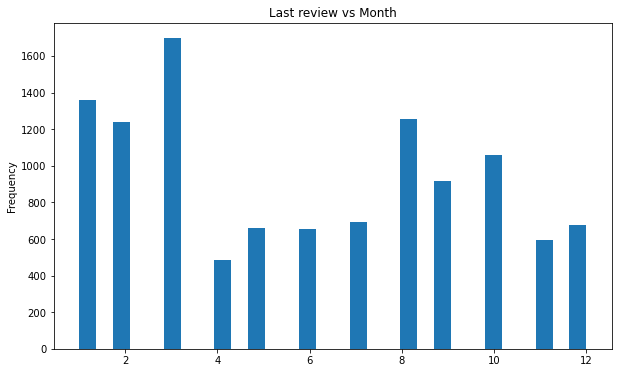

In [752]:
airdata['last_review'] = pd.to_datetime(airdata['last_review'], infer_datetime_format=True)
plt.clf()
airdata['last_review'].map(lambda d: d.month).plot(kind='hist',title='Last review vs Month',figsize=(10,6),bins=30)
plt.show()

Text(0.5, 0, 'Price')

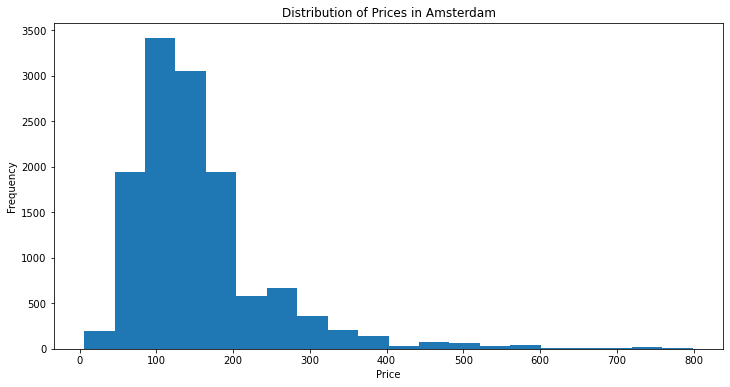

In [753]:
airdata.price[airdata.price<800].plot.hist(bins=20, title ='Distribution of Prices in Amsterdam',figsize=(12,6))
plt.xlabel('Price')

In [754]:
max_availability = airdata[['name','availability_365']].sort_values(by = 'availability_365', ascending = False)
max_availability.head(20)

,name,availability_365
12900,Amsterdam Apartments First Floor,365
6280,A super view on the canal,365
6051,"AMSTERDAM,MUSEUM QUARTER 3 BR IN THE LAP OF LU...",365
9248,THE DUTCH WAY OF LIFE-YOUR HOME IN JORDAAN,365
11448,Light apartment with rooftop tarras,365
9217,3 BEDROOM LUXURY IN SOUTH AMSTERDAM,365
2364,SUPER NICE TOP APARTMENT FOR EXPATs IN AMSTERDAM.,365
2358,One-Bedroom Comfort at Yays Entrepothaven (4pax),365
6159,Awesome Super canal view,365
11493,Great room in best view,365


In [755]:
airdata['id'][airdata['availability_365']==0].count()*100/airdata['id'].count()

60.267267500582705

In [756]:
airdata = pd.get_dummies(airdata, columns=['room_type','neighbourhood'])

airdata

,id,name,host_id,host_name,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,52.35,4.90,3,13,2020-02-15,0.27,...,0,0,0,0,0,0,0,0,0,0
1,13289321,East is where your home is!,10259430,Ana,52.36,4.92,4,14,2019-06-19,0.29,...,0,0,0,0,0,1,0,0,0,0
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,52.38,4.90,2,9,2020-03-16,1.65,...,0,0,0,0,0,0,0,0,0,0
3,7820311,great appartment down town,693472,Ayden,52.38,4.87,3,42,2020-02-17,0.72,...,0,0,0,0,0,0,0,0,1,0
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,52.38,4.87,2,89,2020-02-26,4.02,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,20757739,Quiet stylish private room 15 mins to city ce...,63932037,Michelle,52.37,4.85,1,1,2017-09-13,0.03,...,0,0,0,0,0,0,0,0,0,0
12897,1055570,"Beautiful, spacious apt. with great views @ IJ...",5813322,Rens,52.36,4.98,7,238,2020-02-25,2.75,...,0,0,0,0,0,0,0,0,0,0
12898,13178435,Great apartment de Pijp/Albert Cuyp,46370427,Francien,52.36,4.90,3,15,2018-10-07,0.31,...,0,0,0,0,0,0,0,0,0,0
12899,21963760,Stylish apartment in an amazing location,4895882,Olaf,52.35,4.85,2,11,2019-04-28,0.37,...,0,0,0,0,0,0,0,0,0,1


In [757]:
X = airdata.drop(columns=['price','name','host_name','last_review'],axis=1)
y = airdata[['price']]

In [758]:
X.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_Bijlmer-Centrum', 'neighbourhood_Bijlmer-Oost',
       'neighbourhood_Bos en Lommer', 'neighbourhood_Buitenveldert - Zuidas',
       'neighbourhood_Centrum-Oost', 'neighbourhood_Centrum-West',
       'neighbourhood_De Aker - Nieuw Sloten',
       'neighbourhood_De Baarsjes - Oud-West',
       'neighbourhood_De Pijp - Rivierenbuurt',
       'neighbourhood_Gaasperdam - Driemond',
       'neighbourhood_Geuzenveld - Slotermeer',
       'neighbourhood_IJburg - Zeeburgereiland', 'neighbourhood_Noord-Oost',
       'neighbourhood_Noord-West',
       'neighbourhood_Oostelijk Havengebied - Indische Buurt',
       'neighbourhood_Osdorp', 'neighbourhood_Oud-Noord',
       'neighbourhood

In [759]:
X.shape

(12871, 35)

In [760]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [761]:
model=RandomForestRegressor(n_estimators=600,oob_score=True,max_features="sqrt",random_state=200)
model.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=600, oob_score=True,
                      random_state=200)

In [762]:
y_pred = model.predict(X_test)

In [763]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [764]:
print("RMSE Score: ",rms)

RMSE Score:  157.86957154000262


In [765]:
oairdata = pd.read_csv('/kaggle/input/dphi-amsterdam-airbnb-data/airbnb_listing_validate.csv')
oairdata

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12297872,"Great apartment, super location",44144487,Azarakhsh,nan,De Baarsjes - Oud-West,52.37,4.86,Entire home/apt,2,49,15-09-2019,0.99,1,267
1,3920205,Lovely apartment in Center south!,7594884,"Ruben, Sarah & Lindy",nan,De Pijp - Rivierenbuurt,52.35,4.89,Entire home/apt,3,34,19-09-2019,0.49,38,0
2,26614345,"Sunny family friendly house, centrally located",3903937,Maaike,nan,Oud-Noord,52.39,4.91,Entire home/apt,4,3,21-04-2019,0.13,1,0
3,7433172,1 Br Apartment in Old South A'dam,24969223,Quirien,nan,Zuid,52.34,4.86,Entire home/apt,4,0,NaN,nan,1,0
4,17019744,Luxurious house with garden - central location,114138837,Sietse,nan,Westerpark,52.37,4.87,Entire home/apt,2,9,24-09-2017,0.23,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6446,22941689,Nice room for 2 in city centre on ground floor.,169915566,Wim,nan,Bos en Lommer,52.38,4.85,Private room,3,70,16-03-2020,2.51,1,352
6447,12771038,Beautiful spacious bedroom (25m²),19399691,Jacob,nan,Slotervaart,52.35,4.84,Private room,2,223,01-03-2020,4.54,1,361
6448,19655104,Room on the Amstel in de Pijp (Amsteldijk),26612306,Laurien,nan,De Pijp - Rivierenbuurt,52.35,4.91,Private room,5,3,13-08-2017,0.09,1,0
6449,17862359,Home Sweet Home in the Pijp,8682840,Mireille,nan,De Pijp - Rivierenbuurt,52.35,4.90,Entire home/apt,3,22,23-05-2019,0.57,1,0


In [766]:
oairdata.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [767]:
oairdata.isnull().sum()

id                                   0
name                                11
host_id                              0
host_name                            3
neighbourhood_group               6451
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                        796
reviews_per_month                  796
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [768]:
oairdata.shape

(6451, 15)

In [769]:
oairdata['reviews_per_month'] = oairdata['reviews_per_month'].fillna(np.mean(oairdata['reviews_per_month']))
oairdata = oairdata.drop('neighbourhood_group',axis=1)
oairdata['last_review']=oairdata['last_review'].astype(str)
oairdata['last_review'] = oairdata['last_review'].fillna(oairdata['last_review'].mode()[0])
oairdata = pd.get_dummies(oairdata, columns=['room_type','neighbourhood'])
oairdata = oairdata.drop(columns=['name','host_name','last_review'],axis=1)

In [770]:
oairdata.shape

(6451, 35)

In [771]:
oairdata

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,...,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid
0,12297872,44144487,52.37,4.86,2,49,0.99,1,267,1,...,0,0,0,0,0,0,0,0,0,0
1,3920205,7594884,52.35,4.89,3,34,0.49,38,0,1,...,0,0,0,0,0,0,0,0,0,0
2,26614345,3903937,52.39,4.91,4,3,0.13,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,7433172,24969223,52.34,4.86,4,0,0.74,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,17019744,114138837,52.37,4.87,2,9,0.23,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6446,22941689,169915566,52.38,4.85,3,70,2.51,1,352,0,...,0,0,0,0,0,0,0,0,0,0
6447,12771038,19399691,52.35,4.84,2,223,4.54,1,361,0,...,0,0,0,0,0,0,1,0,0,0
6448,19655104,26612306,52.35,4.91,5,3,0.09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6449,17862359,8682840,52.35,4.90,3,22,0.57,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [772]:
oairdata.shape

(6451, 35)

In [773]:
oairdata.isnull().sum()

id                                                      0
host_id                                                 0
latitude                                                0
longitude                                               0
minimum_nights                                          0
number_of_reviews                                       0
reviews_per_month                                       0
calculated_host_listings_count                          0
availability_365                                        0
room_type_Entire home/apt                               0
room_type_Hotel room                                    0
room_type_Private room                                  0
room_type_Shared room                                   0
neighbourhood_Bijlmer-Centrum                           0
neighbourhood_Bijlmer-Oost                              0
neighbourhood_Bos en Lommer                             0
neighbourhood_Buitenveldert - Zuidas                    0
neighbourhood_

In [774]:
prices = model.predict(oairdata)
prices

array([167.03      , 153.74666667, 161.47166667, ...,  91.37      ,
       167.24166667, 152.78666667])

In [775]:
my_submission = pd.DataFrame({'id': oairdata.id, 'price': prices})
my_submission.to_csv('submission.csv', index=False)

In [776]:
sub = pd.read_csv('./submission.csv')
sub

,id,price
0,12297872,167.03
1,3920205,153.75
2,26614345,161.47
3,7433172,152.36
4,17019744,184.45
...,...,...
6446,22941689,100.71
6447,12771038,77.75
6448,19655104,91.37
6449,17862359,167.24


In [ ]:
# TODO: adding comments left also with some explaination 